# 1 悬崖寻路问题

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

env = gym.make("CliffWalking-v0")    # 0 up, 1 right, 2 down, 3 left
env.reset()
actionspace = env.action_space.n


In [2]:
env.action_space

Discrete(4)

In [3]:
env.observation_space

Discrete(48)

In [4]:
def move_avg(a,n=20,mode="valid"):	# 滑动平均
    return(np.convolve(a, np.ones((n,))/n, mode=mode))	
    
def plot_G(model_name, rew): 
    plt.figure(figsize=[15, 6])
    
    plt.subplot(1,2,1)
    X = np.linspace(1,len(rew),len(rew))
    plt.plot(X, rew)
    plt.xlabel('epochs')
    plt.title(model_name)

    plt.subplot(1,2,2)
    rew = move_avg(rew)
    X = np.linspace(1,len(rew),len(rew))
    plt.plot(X, rew)
    plt.xlabel('epochs')
    plt.title(model_name+'(avg)')
    plt.show()

## 1.1 Q_learning

In [5]:
%run Q_learning.py

In [6]:
import Q_learning
from imp import reload
reload(Q_learning)

model = Q_learning.Qlearning(list(range(actionspace)))

EPOCHS = 500
epsilon_decay = 0.3 # 执行eps衰减策略回合数在总回合数的占比

In [8]:
rew = list()
for epoch in range(EPOCHS):
    # epsilon decay
    model.eps = model.eps_begin + (model.eps_end - model.eps_begin) * np.exp(-epoch/(epsilon_decay * EPOCHS)) # epsilon-greedy 按训练回合数下降，越靠后“探索步”越少。
    obs = env.reset()
    done = False
    final_reward = 0
    while not done:
        
        action = model.choose_action(obs)
        obs_next, reward, done, info = env.step(action)
        model.learn(obs, action, reward, obs_next, done)
        obs = obs_next
        final_reward += reward
        if done:
            print('eps: ', epoch, ' | rewards %4f' %final_reward)
    rew.append(final_reward)


eps:  0  | rewards -9132.000000
eps:  1  | rewards -51652.000000
eps:  2  | rewards -28683.000000
eps:  3  | rewards -46785.000000
eps:  4  | rewards -15630.000000
eps:  5  | rewards -10471.000000
eps:  6  | rewards -3537.000000
eps:  7  | rewards -23498.000000
eps:  8  | rewards -9239.000000
eps:  9  | rewards -2551.000000
eps:  10  | rewards -4566.000000
eps:  11  | rewards -10729.000000
eps:  12  | rewards -39829.000000
eps:  13  | rewards -12087.000000
eps:  14  | rewards -12781.000000
eps:  15  | rewards -11910.000000
eps:  16  | rewards -464.000000
eps:  17  | rewards -4164.000000
eps:  18  | rewards -4267.000000
eps:  19  | rewards -9171.000000
eps:  20  | rewards -12013.000000
eps:  21  | rewards -2238.000000
eps:  22  | rewards -261.000000
eps:  23  | rewards -3226.000000
eps:  24  | rewards -892.000000
eps:  25  | rewards -9948.000000
eps:  26  | rewards -1828.000000
eps:  27  | rewards -15308.000000
eps:  28  | rewards -15607.000000
eps:  29  | rewards -255.000000
eps:  30  

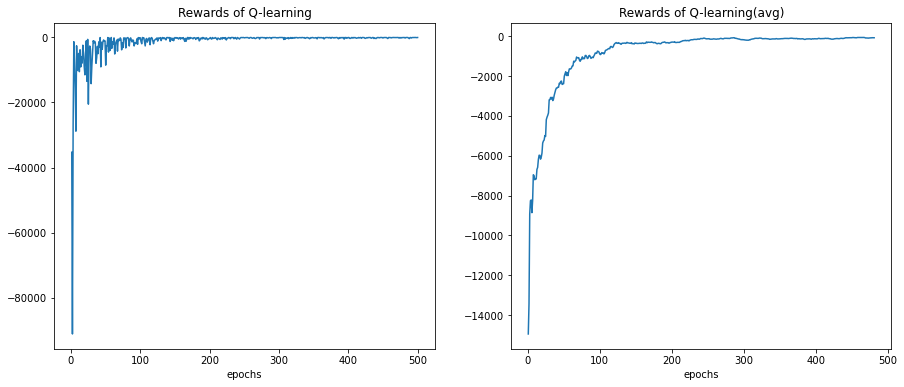

In [ ]:
plot_G('Rewards of Q-learning', rew)